<a href="https://colab.research.google.com/github/GHBCOPS1/GHBCOPS1/blob/main/CMBB__DATA_PRESENTATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'cmbb-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F7373492%2F11745777%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20250510%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20250510T064927Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D01c4c602ef1c0a2b67724e92b546ea174c69e45ce0d17646c62016cae9ead8cfb0284566f3d668559d2c54855e5b05026587b2f44b719f4078e33fa77a1aebee8b6ffc81030067044986b8c4596ae97e4ca3210c3123fc32a549627386fbb5bf636a66be9f3ecc184bfa914e2a6250261b75cb4623ddf42e0d1b512dcdd6f3794fb0fae511b7fb35a540bd2676d1034a46db9a9a6bb9243b80a3a8b15224ac17ffea4c7bd5ceb3e992ccf1322c765ef22146f7925a21d43fa465e59f879d7c2dc765b8a52e5aad3e648cc811bbf21768da12ce5f76b7b0081b5df31e61f3a3b2f8d40c0e9a776d1bc96cbdc4f3d7aeea0833386833d71eacf6f95227f32501b3'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: cmbb-data"
[1] "Downloaded and uncompressed: cmbb-data"
[1] "Data source import complete"


In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "cmbb-data"

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘lazyeval’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘viridis’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘dendextend’, ‘FactoMineR’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


corrplot 0.95 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching pac

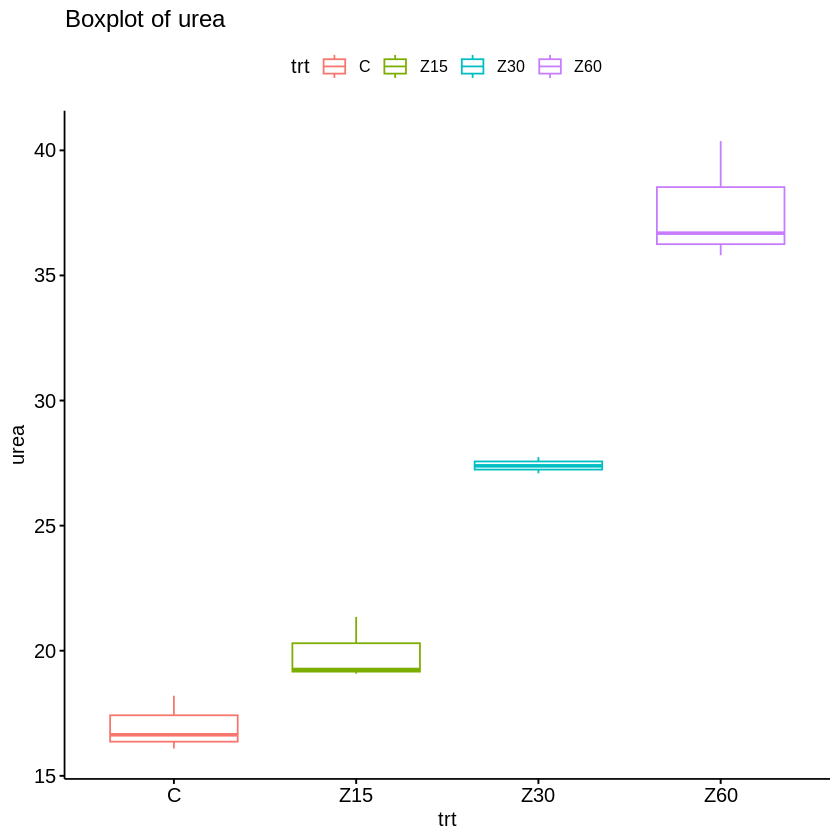

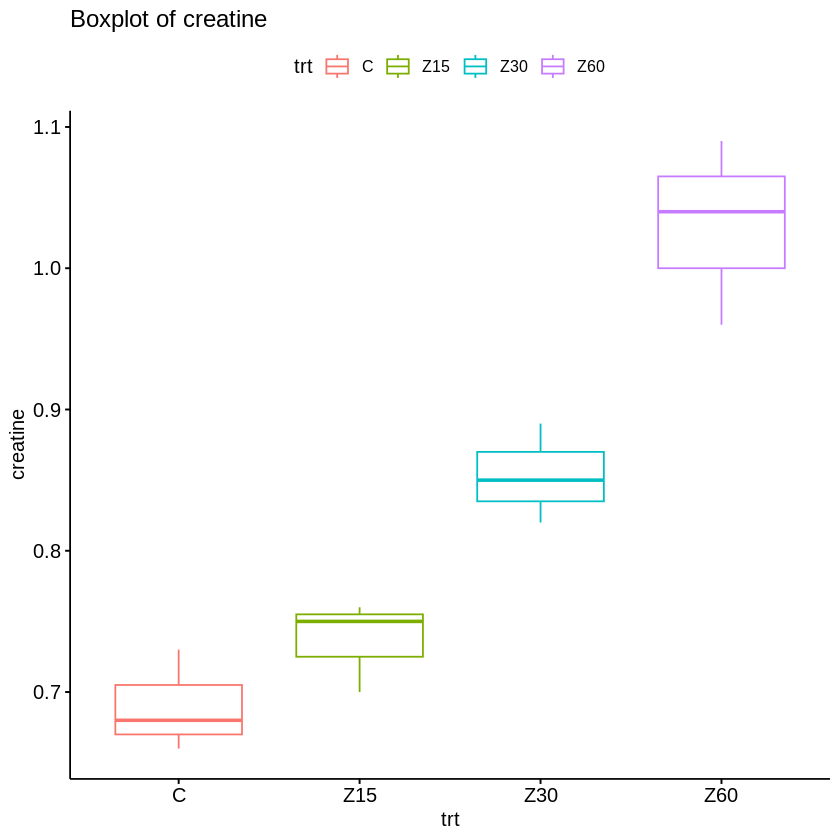

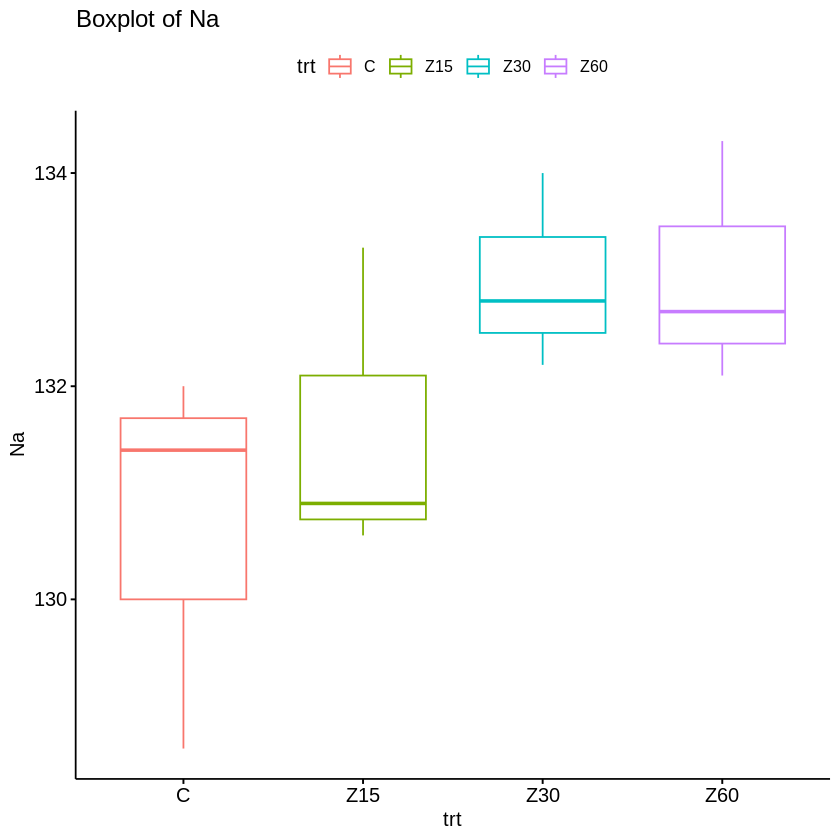

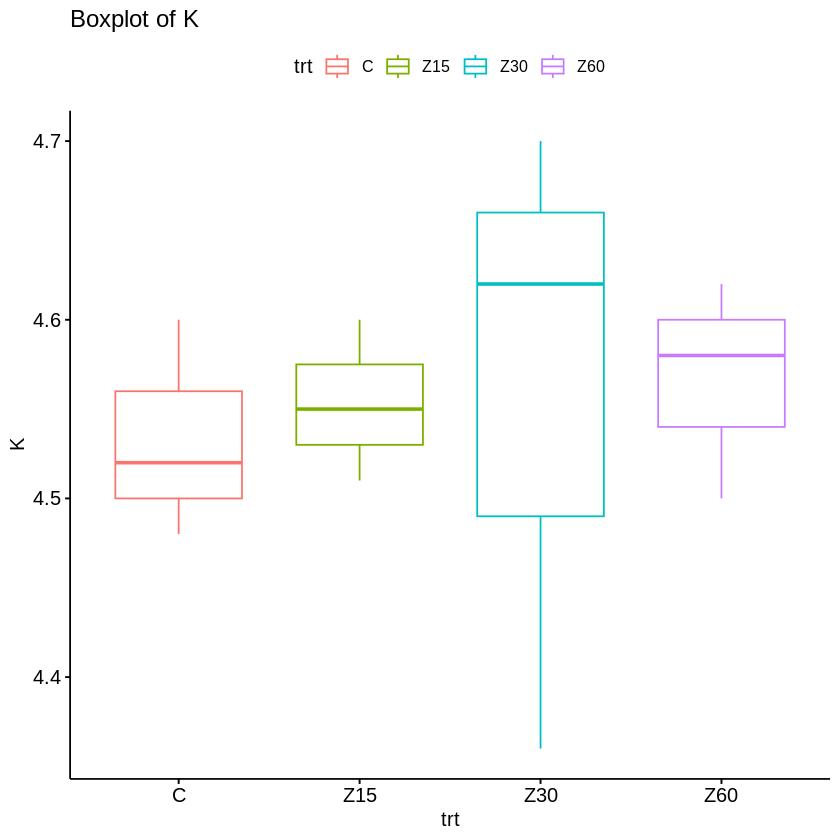

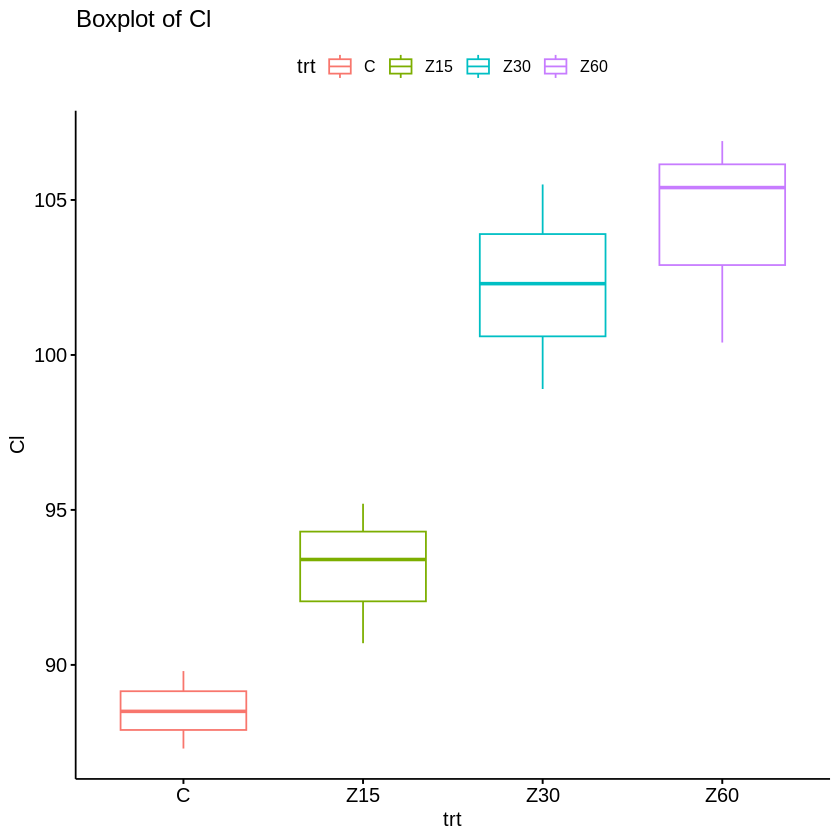

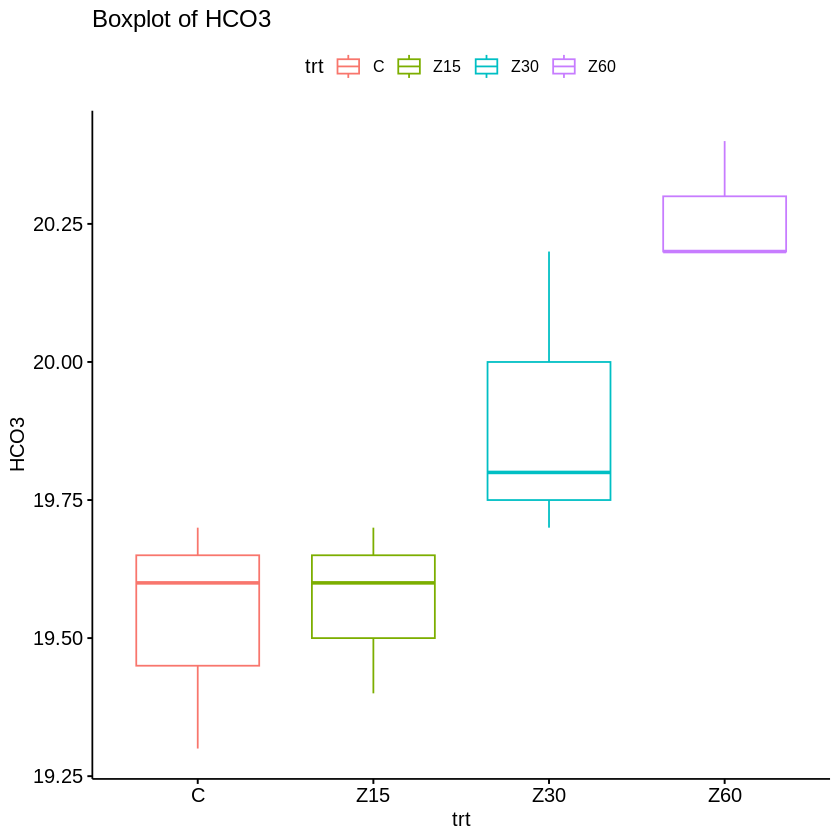

            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          3  764.1  254.69   116.4 6.14e-07 ***
Residuals    8   17.5    2.19                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = formula, data = data)

$trt
             diff        lwr       upr     p adj
Z15-C    2.916667 -0.9514762  6.784809 0.1513053
Z30-C   10.430000  6.5618572 14.298143 0.0001162
Z60-C   20.646667 16.7785238 24.514809 0.0000007
Z30-Z15  7.513333  3.6451905 11.381476 0.0011457
Z60-Z15 17.730000 13.8618572 21.598143 0.0000022
Z60-Z30 10.216667  6.3485238 14.084809 0.0001349

            Df  Sum Sq Mean Sq F value   Pr(>F)    
trt          3 0.20649 0.06883      35 6.01e-05 ***
Residuals    8 0.01573 0.00197                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formu

          Df     Wilks approx F num Df den Df  Pr(>F)  
trt        3 0.0021889   3.8459     18 8.9706 0.02225 *
Residuals  8                                           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Importance of components:
                          PC1    PC2     PC3     PC4     PC5    PC6
Standard deviation     1.9979 1.0635 0.76000 0.49350 0.20618 0.1174
Proportion of Variance 0.6653 0.1885 0.09627 0.04059 0.00709 0.0023
Cumulative Proportion  0.6653 0.8538 0.95003 0.99062 0.99770 1.0000

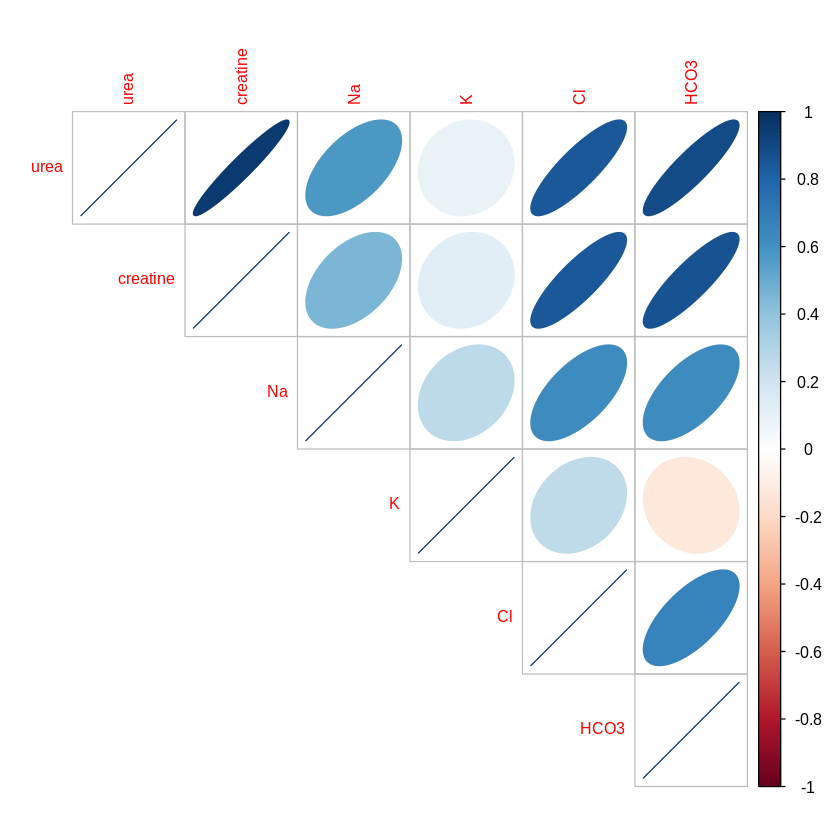

Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse


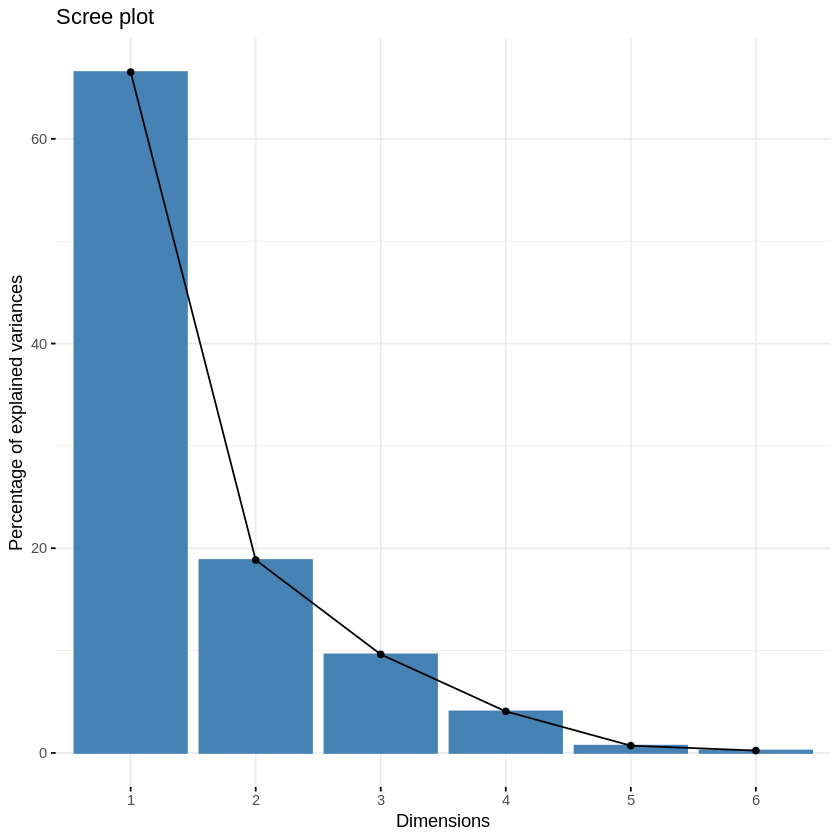

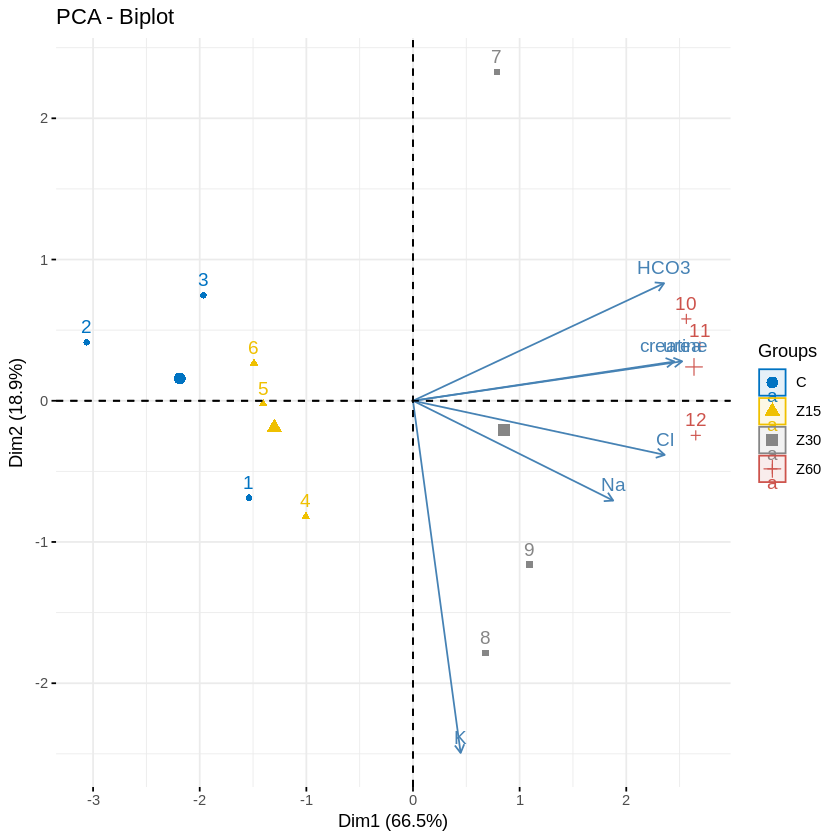

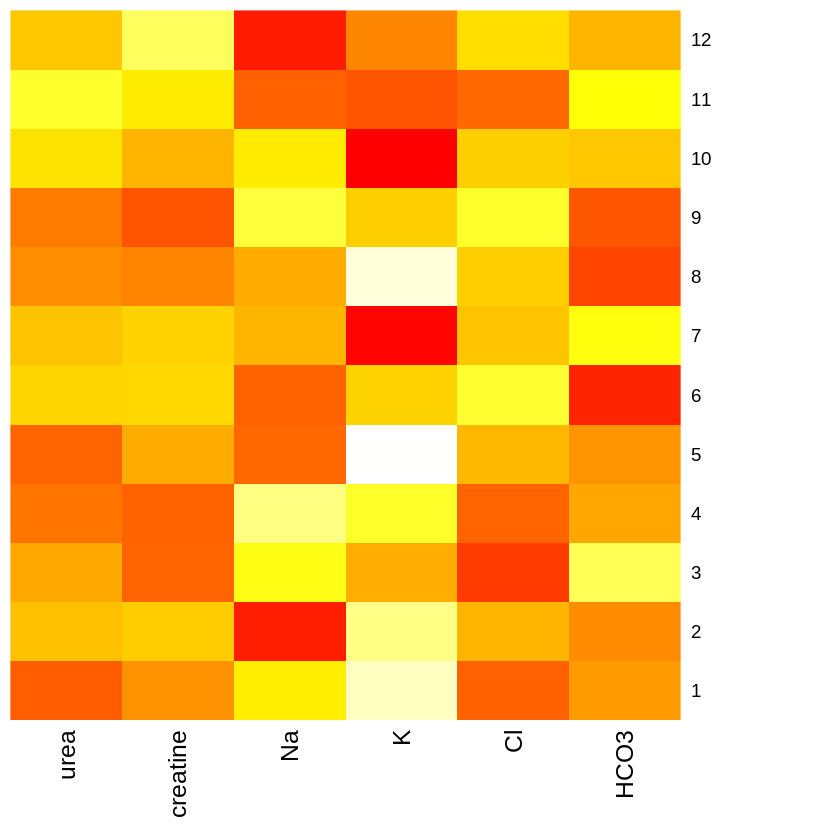

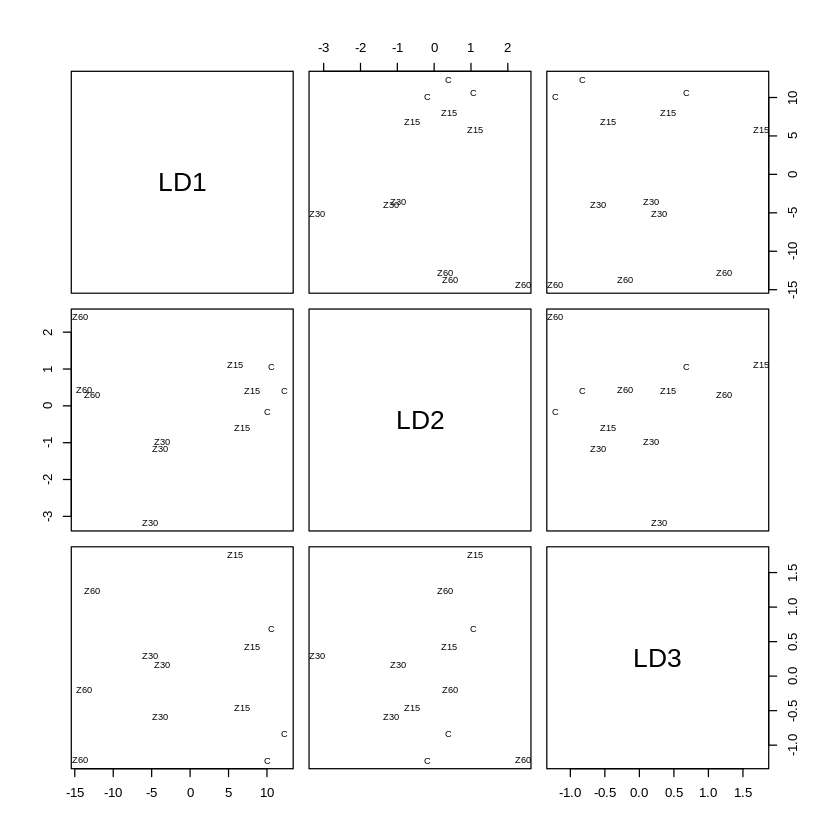

In [3]:
# ---------------------------
# ðŸ“¦ Load required libraries
# ---------------------------
install.packages(c("tidyverse", "car", "corrplot", "factoextra", "ggpubr", "MASS", "reshape2", "ggcorrplot"))
library(tidyverse)
library(car)
library(corrplot)
library(factoextra)
library(ggpubr)
library(MASS)
library(reshape2)
library(ggcorrplot)

# ---------------------------
# ðŸ“¥ 1. Data Entry
# ---------------------------
data <- tribble(
  ~trt, ~rep, ~urea, ~creatine, ~Na, ~K, ~Cl, ~HCO3,
  "C",   1,    16.64,  0.73,     132,   4.6,  89.8, 19.6,
  "C",   2,    16.09,  0.68,     128.6, 4.52, 88.5, 19.3,
  "C",   3,    18.2,   0.66,     131.4, 4.48, 87.3, 19.7,
  "Z15", 1,    19.25,  0.70,     133.3, 4.6,  90.7, 19.7,
  "Z15", 2,    19.08,  0.75,     130.9, 4.55, 93.4, 19.6,
  "Z15", 3,    21.35,  0.76,     130.6, 4.51, 95.2, 19.4,
  "Z30", 1,    27.74,  0.89,     132.2, 4.36, 98.9, 20.2,
  "Z30", 2,    27.39,  0.85,     132.8, 4.7,  102.3,19.7,
  "Z30", 3,    27.09,  0.82,     134.0, 4.62, 105.5,19.8,
  "Z60", 1,    36.69,  0.96,     134.3, 4.5,  105.4,20.2,
  "Z60", 2,    40.37,  1.04,     132.7, 4.58, 100.4,20.4,
  "Z60", 3,    35.81,  1.09,     132.1, 4.62, 106.9,20.2
)

# Convert treatment to factor
data$trt <- as.factor(data$trt)

# ---------------------------
# ðŸ“Š 2. Exploratory Data Analysis
# ---------------------------
# Boxplots
numeric_vars <- colnames(data)[3:8]
for (var in numeric_vars) {
  p <- ggboxplot(data, x = "trt", y = var, title = paste("Boxplot of", var), color = "trt")
  print(p)
}

# Correlation matrix
corr <- cor(data %>% dplyr::select(urea:HCO3))
corrplot(corr, method = "ellipse", type = "upper", tl.cex = 0.8)

# ---------------------------
# ðŸ§ª 3. ANOVA & Post-hoc Tukey
# ---------------------------
for (var in numeric_vars) {
  formula <- as.formula(paste(var, "~ trt"))
  fit <- aov(formula, data = data)
  print(summary(fit))
  print(TukeyHSD(fit))
}

# ---------------------------
# âœ”ï¸ 4. Assumption Checks
# ---------------------------
for (var in numeric_vars) {
  fit <- aov(as.formula(paste(var, "~ trt")), data = data)
  cat("\nNormality Test for", var, "\n")
  print(shapiro.test(residuals(fit)))

  cat("Homogeneity Test for", var, "\n")
  print(leveneTest(as.formula(paste(var, "~ trt")), data = data))
}

# ---------------------------
# ðŸ§ª 5. Kruskal-Wallis (non-parametric)
# ---------------------------
for (var in numeric_vars) {
  cat("\nKruskal-Wallis Test for", var, "\n")
  print(kruskal.test(as.formula(paste(var, "~ trt")), data = data))
}

# ---------------------------
# ðŸ”¬ 6. MANOVA
# ---------------------------
manova_model <- manova(cbind(urea, creatine, Na, K, Cl, HCO3) ~ trt, data = data)
summary(manova_model, test = "Wilks")

# ---------------------------
# ðŸ“ 7. Principal Component Analysis (PCA)
# ---------------------------
scaled_data <- scale(data %>% dplyr::select(urea:HCO3))
pca <- prcomp(scaled_data, center = TRUE, scale. = TRUE)
summary(pca)
fviz_eig(pca)  # Scree plot
fviz_pca_biplot(pca, habillage = data$trt, addEllipses = TRUE, palette = "jco")

# ---------------------------
# ðŸ”¥ 8. Heatmap (Clustering)
# ---------------------------
heatmap(scale(data[,3:8]), Rowv = NA, Colv = NA, col = heat.colors(256), margins = c(6, 8))

# ---------------------------
# ðŸ§  9. Linear Discriminant Analysis (LDA)
# ---------------------------
lda_model <- lda(trt ~ urea + creatine + Na + K + Cl + HCO3, data = data)
plot(lda_model)
